In [1]:
import folium
import geopandas
import matplotlib
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

In [2]:
import pandas as pd

In [3]:
m = folium.Map(location=[-23.31, -51.162778],zoom_start=12)

In [40]:
londrina = geopandas.read_file('bairros/LIM_Bairros_V1.shp')

In [41]:
londrina

,bairros,area_m2,regiao,geometry
0,Perobinha,4873017.43,NORTE,"POLYGON ((479188.530 7426258.498, 479160.614 7..."
1,Heimtal,289590.81,NORTE,"POLYGON ((484108.671 7428575.401, 484110.934 7..."
2,Parigot de Souza,4156123.20,NORTE,"POLYGON ((482059.685 7427577.571, 482059.214 7..."
3,Vivi Xavier,5510368.41,NORTE,"POLYGON ((484277.441 7426998.198, 484314.495 7..."
4,Cinco Conjuntos,6809195.63,NORTE,"POLYGON ((486621.058 7428317.606, 486660.128 7..."
5,Cilo 3,5375366.72,OESTE,"POLYGON ((478789.318 7424961.811, 478709.616 7..."
6,Cilo 2,1990552.25,OESTE,"POLYGON ((477970.016 7424109.252, 478684.141 7..."
7,Cidade Industrial 1,5461977.90,NORTE,"POLYGON ((489452.880 7426629.675, 489472.000 7..."
8,Alpes,3758580.99,NORTE,"POLYGON ((484136.255 7425221.560, 484136.255 7..."
9,Pacaembú,3363450.02,NORTE,"POLYGON ((485573.050 7424885.947, 485547.560 7..."


In [5]:
lojas = pd.read_csv('coordenadas.csv')

In [12]:
lista = []
for index, loja in lojas.iterrows():
    if loja['Longitude'] == 0.00000 or loja['Longitude'] < -51.35:
        continue
    lista.append(Point(loja['Longitude'],loja['Latitude']))

In [13]:
lojas['geometry'] = lista
lojas

ValueError: Length of values does not match length of index

In [17]:
#lojasGeo = geopandas.GeoDataFrame(lojas, geometry=lista)

plista = pd.DataFrame(lista)
glista = geopandas.GeoSeries(lista)
glista

0      POINT (-51.18442 -23.29995)
1      POINT (-51.13779 -23.35333)
2      POINT (-51.16904 -23.30120)
3      POINT (-51.14429 -23.25820)
4      POINT (-51.18892 -23.34483)
                  ...             
182    POINT (-51.16042 -23.30908)
183    POINT (-51.16292 -23.30058)
184    POINT (-51.17267 -23.27995)
185    POINT (-51.16667 -23.34508)
186    POINT (-51.17080 -23.30304)
Length: 187, dtype: geometry

In [9]:
lojasGeo.head()

,Unnamed: 0,Classificação,Latitude,Longitude,Nome,geometry
0,0,(26),-23.299955,-51.184416,Espaço Smart,POINT (-51.18442 -23.29995)
1,1,(235),-23.353330,-51.137791,Depósito Roseira - Construção e Acabamentos,POINT (-51.13779 -23.35333)
2,2,(317),-23.301205,-51.169041,Depósito São Marcos,POINT (-51.16904 -23.30120)
3,3,(150),-23.258204,-51.144291,Depósito Alvorada - Materiais de Construção,POINT (-51.14429 -23.25820)
4,4,(12),-23.344830,-51.188916,Gol Materiais Para Construção,POINT (-51.18892 -23.34483)


NameError: name 'df' is not defined

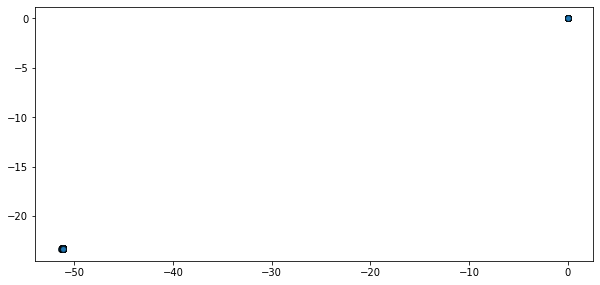

In [10]:
hg = geopandas.GeoDataFrame(plista, geometry=glista)

ax = hg.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

fig, ax = plt.subplots(figsize=(24,18))
londrina.plot(ax=ax, alpha=0.4, color='grey')
lojasGeo.plot(column='Nome', ax=ax, legend=True)
plt.title('Volcanoes')

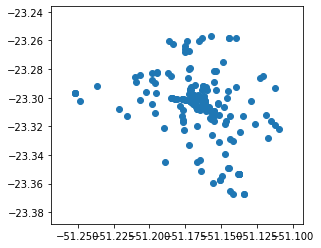

In [18]:
glista.plot()

In [56]:
dh = geopandas.GeoSeries(lista)

<ipython-input-56-2e2ce1c65aff>:1: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  dh = geopandas.GeoSeries(lista)


In [57]:
dh.plot()

TypeError: no numeric data to plot

In [1]:

ax = londrina.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
df = londrina.to_crs(epsg=3857)
base = glista.plot()
df.plot(ax=base, color='red', markersize=5);
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

ctx.add_basemap(ax)


NameError: name 'londrina' is not defined

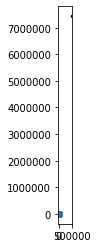

In [42]:
base = londrina.plot(color='white', edgecolor='black')

glista.plot(ax=base);



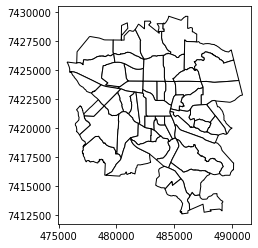

In [41]:
londrina.plot(color='white', edgecolor='black')

In [81]:
map.save("map.html")
import selenium.webdriver
driver = selenium.webdriver.PhantomJS(executable_path="phantomjs-2.1.1-linux-x86_64/bin/phantomjs")
driver.set_window_size(1000, 1000)  # choose a resolution
driver.get('map.html')
# You may need to add time.sleep(seconds) here
driver.save_screenshot('screenshot.png')

/home/renan/anaconda3/envs/py3/lib/python3.8/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


True

In [80]:
m

In [64]:
lojas['Classificação'] = lojas['Classificação'].str.strip('()')

In [76]:
lojas['Classificação'].astype(float).max()

847.0

In [77]:
lojas['Classificação'][1]

'235'

In [82]:
map = folium.Map(location=[-23.31, -51.162778],zoom_start=13)
for index , loja in lojas.iterrows():
    valor = lojas['Classificação'][index]
    folium.CircleMarker(
        location=[loja['Latitude'], loja['Longitude']],
        radius=(float(valor)/847)*15
    ).add_to(map)

map
map.save("map.html")
import selenium.webdriver
driver = selenium.webdriver.PhantomJS(executable_path="phantomjs-2.1.1-linux-x86_64/bin/phantomjs")
driver.set_window_size(1000, 1000)  # choose a resolution
driver.get('map.html')
# You may need to add time.sleep(seconds) here
driver.save_screenshot('screenshot.png')

True

In [46]:
glista

0      POINT (-51.18442 -23.29995)
1      POINT (-51.13779 -23.35333)
2      POINT (-51.16904 -23.30120)
3      POINT (-51.14429 -23.25820)
4      POINT (-51.18892 -23.34483)
                  ...             
182    POINT (-51.16042 -23.30908)
183    POINT (-51.16292 -23.30058)
184    POINT (-51.17267 -23.27995)
185    POINT (-51.16667 -23.34508)
186    POINT (-51.17080 -23.30304)
Length: 187, dtype: geometry

In [35]:
import shapefile
from json import dumps

# read the shapefile
reader = shapefile.Reader("bairros/LIM_Bairros_V1.shp")
fields = reader.fields[1:]
field_names = [field[0] for field in fields]
buffer = []
for sr in reader.shapeRecords():
   atr = dict(zip(field_names, sr.record))
   geom = sr.shape.__geo_interface__
   buffer.append(dict(type="Feature", \
                      geometry=geom, properties=atr)) 

# write the GeoJSON file

geojson = open("pyshp-demo.json", "w")
geojson.write(dumps({"type": "FeatureCollection", "features": buffer}, indent=2) + "\n")
geojson.close()

In [36]:
geojson

<_io.TextIOWrapper name='pyshp-demo.json' mode='w' encoding='UTF-8'>

In [80]:
londrinaMap = "pyshp-demo.json"
map = folium.Map(location=[-23.31, -51.162778],zoom_start=13)
folium.GeoJson(
    londrinaMap,
    name='geojson'
).add_to(map)
map